In [358]:
# import libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore the warnings
warnings.filterwarnings("ignore")

In [359]:
# Read the df from the csv file
df = pd.read_csv('data/query_result_2024-05-08T02_53_06.099752Z.csv')

# Check the df
df

,ID,ACCOUNT_ID,EVENT,TIMESTAMP,PAGE_URL,BUTTON_LABEL
0,1,83,Button Clicked,2022-03-15T00:18:25,NaN,Invite
1,2,83,Page Viewed,2022-03-15T00:20:48,www.piespace.example/invite,NaN
2,3,83,Page Viewed,2022-03-15T00:20:48,www.piespace.example/home,NaN
3,4,83,Page Viewed,2022-03-15T00:25:26,www.piespace.example/home,NaN
4,5,83,Page Viewed,2022-03-15T00:26:00,www.piespace.example/invite,NaN
...,...,...,...,...,...,...
37164,37168,432,Page Viewed,2022-06-21T22:33:03,www.piespace.example/invite,NaN
37165,37169,432,Page Viewed,2022-06-21T22:33:03,www.piespace.example/help,NaN
37166,37170,432,Page Viewed,2022-06-21T22:36:59,www.piespace.example/help,NaN
37167,37171,134,Page Viewed,2022-06-21T22:37:25,www.piespace.example/pies,NaN


# Clean data

In [360]:
# Convert the timestamp format into YYYY-MM-DD
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
# df['TIMESTAMP'] = df['TIMESTAMP'].dt.strftime('%Y-%m-%d')
df['TIMESTAMP'] = df['TIMESTAMP'].dt.date
df


,ID,ACCOUNT_ID,EVENT,TIMESTAMP,PAGE_URL,BUTTON_LABEL
0,1,83,Button Clicked,2022-03-15,NaN,Invite
1,2,83,Page Viewed,2022-03-15,www.piespace.example/invite,NaN
2,3,83,Page Viewed,2022-03-15,www.piespace.example/home,NaN
3,4,83,Page Viewed,2022-03-15,www.piespace.example/home,NaN
4,5,83,Page Viewed,2022-03-15,www.piespace.example/invite,NaN
...,...,...,...,...,...,...
37164,37168,432,Page Viewed,2022-06-21,www.piespace.example/invite,NaN
37165,37169,432,Page Viewed,2022-06-21,www.piespace.example/help,NaN
37166,37170,432,Page Viewed,2022-06-21,www.piespace.example/help,NaN
37167,37171,134,Page Viewed,2022-06-21,www.piespace.example/pies,NaN


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37169 entries, 0 to 37168
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            37169 non-null  int64 
 1   ACCOUNT_ID    37169 non-null  int64 
 2   EVENT         37169 non-null  object
 3   TIMESTAMP     37169 non-null  object
 4   PAGE_URL      31985 non-null  object
 5   BUTTON_LABEL  5184 non-null   object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [362]:
# Get all the rows which have EVENT Button Clicked
df = df[df['EVENT'] == 'Button Clicked']
df = df.drop_duplicates(subset=['ACCOUNT_ID', 'EVENT', 'TIMESTAMP'])
# df.to_csv('df1.csv')
df

,ID,ACCOUNT_ID,EVENT,TIMESTAMP,PAGE_URL,BUTTON_LABEL
0,1,83,Button Clicked,2022-03-15,NaN,Invite
13,14,24,Button Clicked,2022-03-15,NaN,Invite
18,19,31,Button Clicked,2022-03-15,NaN,Create Item
41,42,156,Button Clicked,2022-03-15,NaN,Subscribe
47,48,15,Button Clicked,2022-03-15,NaN,Checkout
...,...,...,...,...,...,...
37076,37080,51,Button Clicked,2022-06-21,NaN,Create Item
37119,37123,889,Button Clicked,2022-06-21,NaN,Checkout
37138,37142,713,Button Clicked,2022-06-21,NaN,Subscribe
37152,37156,48,Button Clicked,2022-06-21,NaN,Invite


In [363]:
df2 = df[['ACCOUNT_ID', 'TIMESTAMP']].copy(deep=True)
df2.to_csv("data/df2_ch.csv")
df2

,ACCOUNT_ID,TIMESTAMP
0,83,2022-03-15
13,24,2022-03-15
18,31,2022-03-15
41,156,2022-03-15
47,15,2022-03-15
...,...,...
37076,51,2022-06-21
37119,889,2022-06-21
37138,713,2022-06-21
37152,48,2022-06-21


In [364]:
start_week = df2['TIMESTAMP'].min()
start_week

datetime.date(2022, 3, 15)

In [365]:
df2['TIMESTAMP']    = pd.to_datetime(df2['TIMESTAMP'])
start_week          = pd.to_datetime(start_week)

df2['visited_week_index'] = (df2['TIMESTAMP'] - start_week).dt.days // 7
df2.to_csv('data/visited_week.csv')
df2

,ACCOUNT_ID,TIMESTAMP,visited_week_index
0,83,2022-03-15,0
13,24,2022-03-15,0
18,31,2022-03-15,0
41,156,2022-03-15,0
47,15,2022-03-15,0
...,...,...,...
37076,51,2022-06-21,14
37119,889,2022-06-21,14
37138,713,2022-06-21,14
37152,48,2022-06-21,14


In [366]:
# Find cohort week, it is simply the first week corresponding to a specific account ID visit the web
df3 = df2.groupby('ACCOUNT_ID')['visited_week_index'].min().reset_index()
df3 = df3.rename(columns={'visited_week_index':'cohort_week'})
df3


,ACCOUNT_ID,cohort_week
0,1,2
1,2,0
2,3,12
3,4,4
4,5,0
...,...,...
1228,1524,4
1229,1525,4
1230,1526,7
1231,1527,5


In [367]:
df4 = df2.join(df3.set_index('ACCOUNT_ID'), on='ACCOUNT_ID')
df4

,ACCOUNT_ID,TIMESTAMP,visited_week_index,cohort_week
0,83,2022-03-15,0,0
13,24,2022-03-15,0,0
18,31,2022-03-15,0,0
41,156,2022-03-15,0,0
47,15,2022-03-15,0,0
...,...,...,...,...
37076,51,2022-06-21,14,0
37119,889,2022-06-21,14,14
37138,713,2022-06-21,14,14
37152,48,2022-06-21,14,4


In [368]:
df4['cohort_index'] = df4.visited_week_index - df4.cohort_week
df4

,ACCOUNT_ID,TIMESTAMP,visited_week_index,cohort_week,cohort_index
0,83,2022-03-15,0,0,0
13,24,2022-03-15,0,0,0
18,31,2022-03-15,0,0,0
41,156,2022-03-15,0,0,0
47,15,2022-03-15,0,0,0
...,...,...,...,...,...
37076,51,2022-06-21,14,0,14
37119,889,2022-06-21,14,14,0
37138,713,2022-06-21,14,14,0
37152,48,2022-06-21,14,4,10


In [369]:
df5 = df4[['ACCOUNT_ID', 'cohort_week', 'cohort_index']]
df5

,ACCOUNT_ID,cohort_week,cohort_index
0,83,0,0
13,24,0,0
18,31,0,0
41,156,0,0
47,15,0,0
...,...,...,...
37076,51,0,14
37119,889,14,0
37138,713,14,0
37152,48,4,10


In [370]:
df6 = df5.drop_duplicates(subset=['ACCOUNT_ID', 'cohort_week', 'cohort_index'], keep='first')
df6

,ACCOUNT_ID,cohort_week,cohort_index
0,83,0,0
13,24,0,0
18,31,0,0
41,156,0,0
47,15,0,0
...,...,...,...
37076,51,0,14
37119,889,14,0
37138,713,14,0
37152,48,4,10


In [371]:
df7 = df6.groupby(['cohort_week', 'cohort_index'])['ACCOUNT_ID'].count().reset_index()
df7 = df7.rename(columns={'ACCOUNT_ID':'number_of_accounts'})
df7

,cohort_week,cohort_index,number_of_accounts
0,0,0,130
1,0,1,53
2,0,2,42
3,0,3,44
4,0,4,42
...,...,...,...
112,12,1,11
113,12,2,1
114,13,0,82
115,13,1,6


In [372]:
df8 = df7.pivot_table(index='cohort_week', columns='cohort_index', values='number_of_accounts')
df8

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort_week,,,,,,,,,,,,,,,
0,130.0,53.0,42.0,44.0,42.0,40.0,38.0,36.0,38.0,38.0,35.0,41.0,43.0,37.0,11.0
1,127.0,21.0,19.0,14.0,17.0,12.0,14.0,21.0,16.0,18.0,18.0,21.0,15.0,7.0,NaN
2,87.0,20.0,15.0,11.0,8.0,10.0,13.0,8.0,11.0,12.0,11.0,10.0,3.0,NaN,NaN
3,107.0,18.0,12.0,9.0,10.0,10.0,7.0,8.0,7.0,7.0,2.0,1.0,NaN,NaN,NaN
4,73.0,10.0,10.0,6.0,8.0,11.0,9.0,4.0,6.0,4.0,1.0,NaN,NaN,NaN,NaN
5,71.0,7.0,2.0,9.0,8.0,3.0,3.0,6.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
6,89.0,11.0,13.0,9.0,9.0,5.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,70.0,12.0,11.0,7.0,5.0,7.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,72.0,15.0,5.0,5.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
df9 = df8.divide(df8.iloc[:,0], axis=0).round(3)*100
df9

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort_week,,,,,,,,,,,,,,,
0,100.0,40.8,32.3,33.8,32.3,30.8,29.2,27.7,29.2,29.2,26.9,31.5,33.1,28.5,8.5
1,100.0,16.5,15.0,11.0,13.4,9.4,11.0,16.5,12.6,14.2,14.2,16.5,11.8,5.5,NaN
2,100.0,23.0,17.2,12.6,9.2,11.5,14.9,9.2,12.6,13.8,12.6,11.5,3.4,NaN,NaN
3,100.0,16.8,11.2,8.4,9.3,9.3,6.5,7.5,6.5,6.5,1.9,0.9,NaN,NaN,NaN
4,100.0,13.7,13.7,8.2,11.0,15.1,12.3,5.5,8.2,5.5,1.4,NaN,NaN,NaN,NaN
5,100.0,9.9,2.8,12.7,11.3,4.2,4.2,8.5,4.2,1.4,NaN,NaN,NaN,NaN,NaN
6,100.0,12.4,14.6,10.1,10.1,5.6,6.7,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100.0,17.1,15.7,10.0,7.1,10.0,11.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,20.8,6.9,6.9,5.6,4.2,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


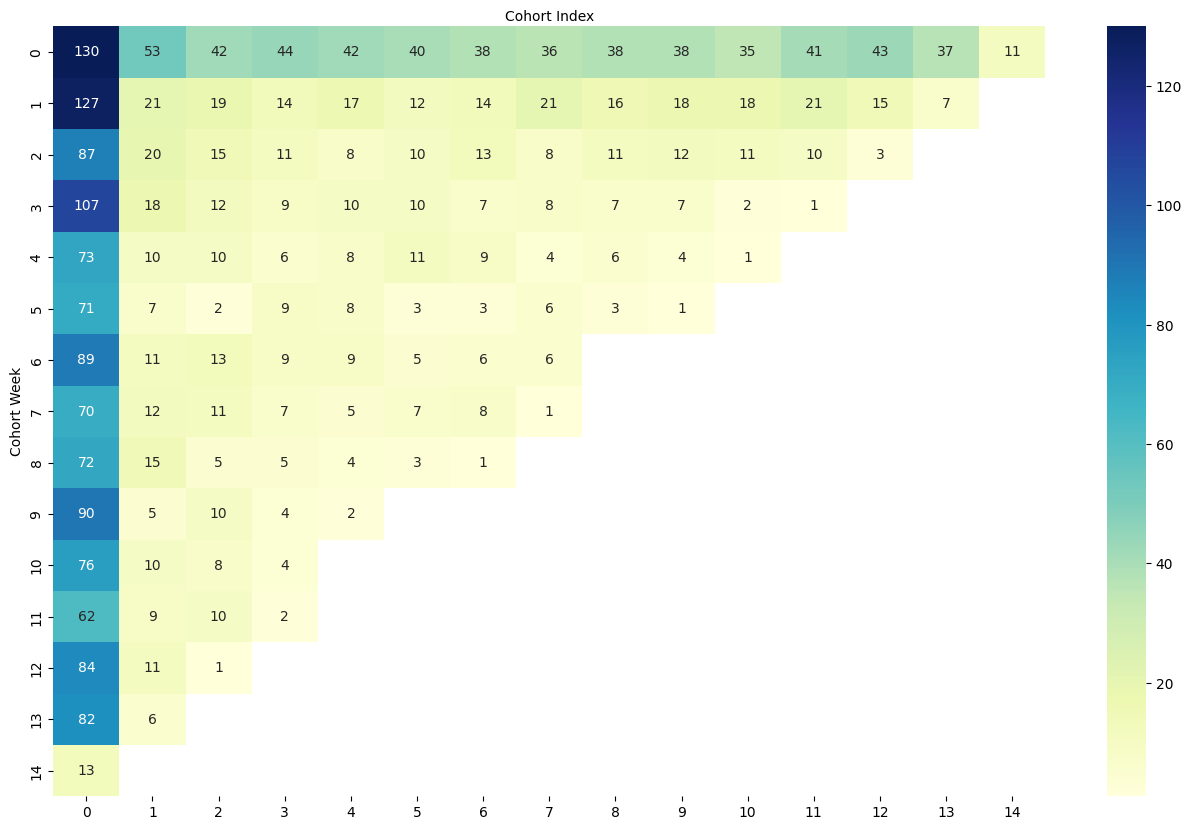

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap(df8, annot = True, cmap="YlGnBu", fmt='g')

ax.set_xlabel('Cohort Index')
ax.set_ylabel("Cohort Week")
ax.xaxis.set_label_position('top')

plt.show()

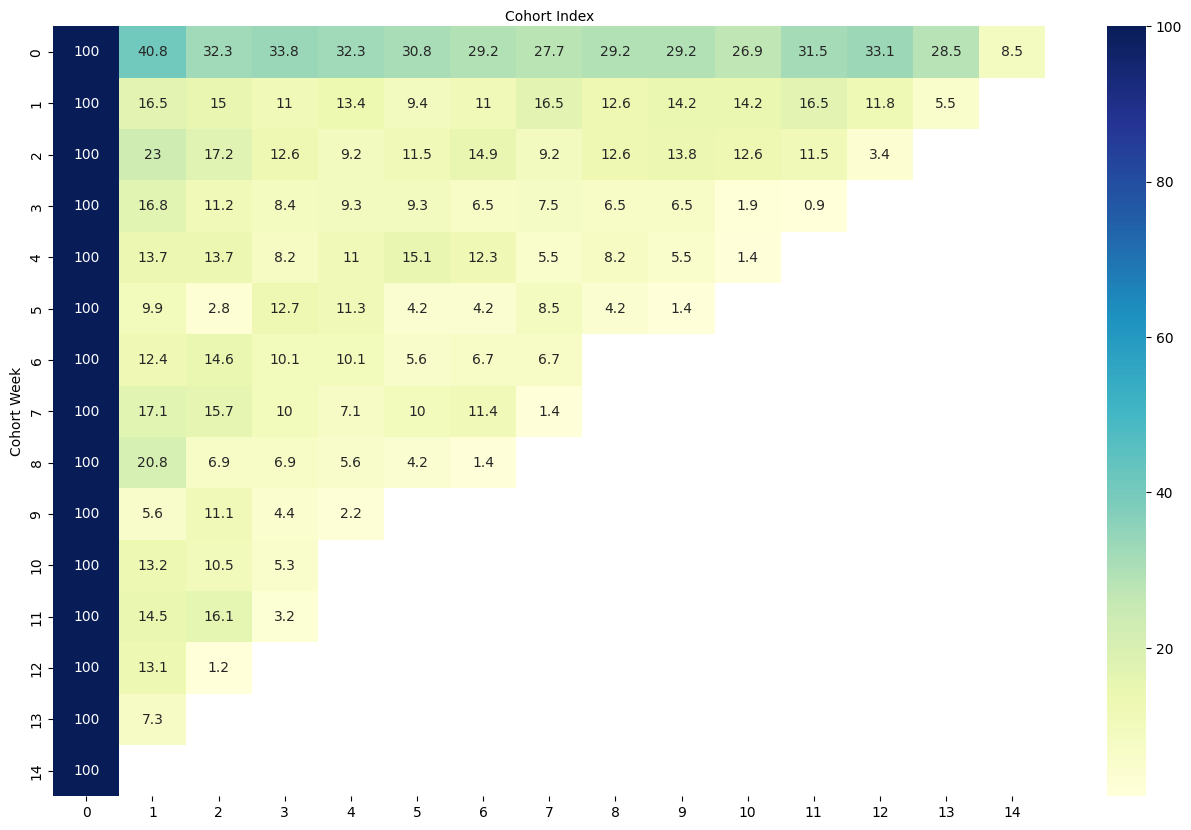

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap(df9, annot = True, cmap="YlGnBu", fmt='g')

ax.set_xlabel('Cohort Index')
ax.set_ylabel("Cohort Week")
ax.xaxis.set_label_position('top')

plt.show()

## Bonus
- Here I try to plot a better graph

In [376]:
# Get the week index following by the week date
# Define the start date and the number of weeks
min_timestamp_df = df4.groupby('cohort_week')['TIMESTAMP'].min().reset_index()
min_timestamp_df

df7_improved = df7.join(min_timestamp_df.set_index('cohort_week'), on='cohort_week')
df7_improved = df7_improved[['TIMESTAMP', 'cohort_index', 'number_of_accounts']]
df7_improved = df7_improved.rename(columns={'TIMESTAMP':'cohort_week'})
df7_improved = df7_improved.pivot_table(index='cohort_week', columns='cohort_index', values='number_of_accounts')
active_user  = df7_improved.iloc[:,0]
df7_improved = df7_improved.divide(df7_improved.iloc[:,0], axis=0).round(3)*100
df7_improved

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort_week,,,,,,,,,,,,,,,
2022-03-15,100.0,40.8,32.3,33.8,32.3,30.8,29.2,27.7,29.2,29.2,26.9,31.5,33.1,28.5,8.5
2022-03-22,100.0,16.5,15.0,11.0,13.4,9.4,11.0,16.5,12.6,14.2,14.2,16.5,11.8,5.5,NaN
2022-03-29,100.0,23.0,17.2,12.6,9.2,11.5,14.9,9.2,12.6,13.8,12.6,11.5,3.4,NaN,NaN
2022-04-05,100.0,16.8,11.2,8.4,9.3,9.3,6.5,7.5,6.5,6.5,1.9,0.9,NaN,NaN,NaN
2022-04-12,100.0,13.7,13.7,8.2,11.0,15.1,12.3,5.5,8.2,5.5,1.4,NaN,NaN,NaN,NaN
2022-04-19,100.0,9.9,2.8,12.7,11.3,4.2,4.2,8.5,4.2,1.4,NaN,NaN,NaN,NaN,NaN
2022-04-26,100.0,12.4,14.6,10.1,10.1,5.6,6.7,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,100.0,17.1,15.7,10.0,7.1,10.0,11.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-10,100.0,20.8,6.9,6.9,5.6,4.2,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
active_user.info()
active_user = active_user.astype(int)

<class 'pandas.core.series.Series'>
DatetimeIndex: 15 entries, 2022-03-15 to 2022-06-21
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
15 non-null     float64
dtypes: float64(1)
memory usage: 240.0 bytes


In [378]:
# Convert index to the desired format before plotting
df7_improved.index = df7_improved.index.strftime('%Y-%m-%d')
df7_improved.insert(0, 'Active users', active_user)

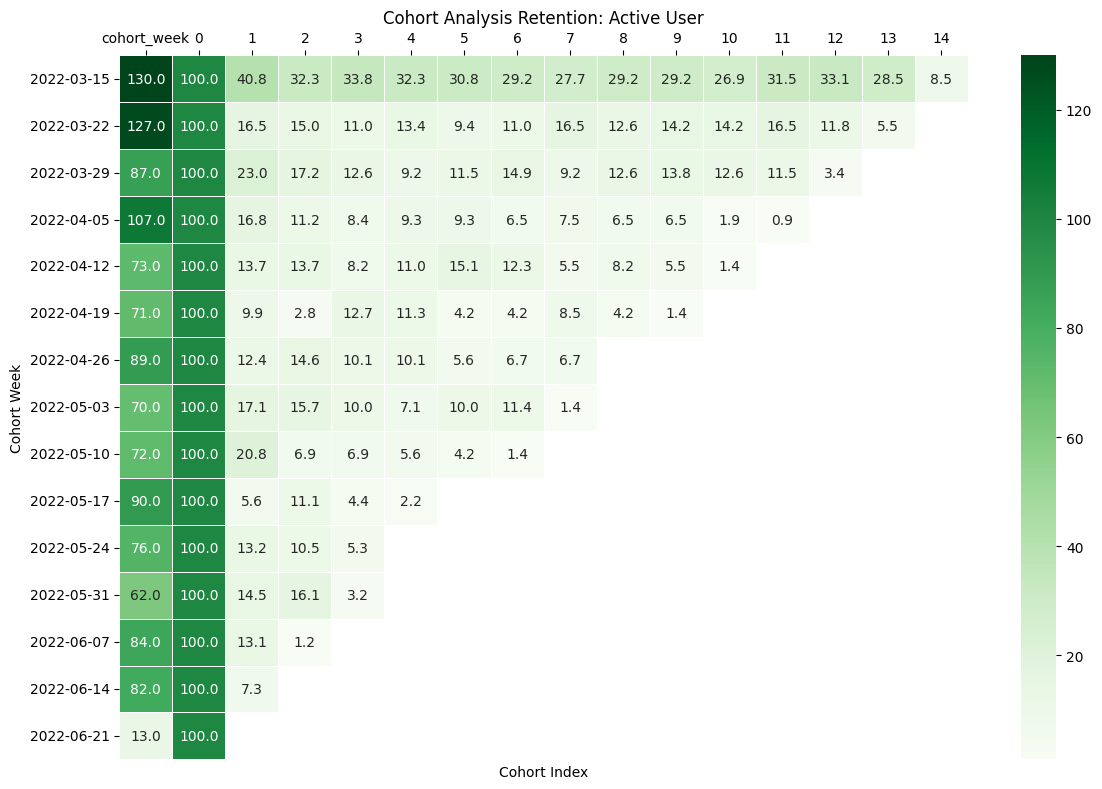

In [379]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df7_improved, cmap='Greens', annot=True, fmt=".1f", linewidths=.5)

# Move x-axis labels to the top
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

plt.title('Cohort Analysis Retention: Active User')
plt.xlabel('Cohort Index', y=1)
plt.ylabel('Cohort Week')
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
